In [1]:
## git clone https://github.com/CSSEGISandData/COVID-19.git


In [2]:
path = "../COVID-19/csse_covid_19_data/csse_covid_19_time_series/"

In [3]:
d1 = "time_series_covid19_confirmed_global.csv"
d2 = "time_series_covid19_deaths_global.csv"
d3 = "time_series_covid19_recovered_global.csv"




In [4]:
import pandas as pd

In [5]:
dd1 = pd.read_csv(path+d1)

In [6]:
dd1.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/27/20             int64
3/28/20             int64
3/29/20             int64
3/30/20             int64
3/31/20             int64
Length: 74, dtype: object

In [7]:
country = []
for i in dd1['Country/Region'].drop_duplicates():
    country.append(i)
    
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%y')


In [8]:
df_0 = dd1.loc[lambda df: df['Country/Region'] == country[0]]
df_0.loc[country[0], :] = df_0.sum()
data = df_0.T[4:]
data_0 = data.loc[lambda df: df[country[0]] >100]

#data['date'] = [ dateparse(i) for i in data.index ]
data_0['day'] = [ i for i,ii in enumerate(data_0.index) ]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [9]:
len(data_0['day'])

5

In [10]:
data_0

,0,Afghanistan,day
3/27/20,110,110,0
3/28/20,110,110,1
3/29/20,120,120,2
3/30/20,170,170,3
3/31/20,174,174,4


In [11]:
country2 = []
for i in country[1:]:    
    df_1 = dd1.loc[lambda df: df['Country/Region'] == i]
    df_1.loc[i, :] = df_1.sum()

    data1 = df_1.T[4:]
    data_1 = data1.loc[lambda df: df[i] >1000]
    data_1['day'] = [ j for j,ii in enumerate(data_1.index) ]
    #data1['date'] = [ dateparse(j) for j in data1.index ]
    if len(data_1['day'])>0:    
        data_0 = data_0.merge(data_1, how='outer', on='day')
        country2.append(i)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
country2

['Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Brazil',
 'Canada',
 'Chile',
 'China',
 'Czechia',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Korea, South',
 'Luxembourg',
 'Malaysia',
 'Mexico',
 'Netherlands',
 'Norway',
 'Pakistan',
 'Panama',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'South Africa',
 'Spain',
 'Sweden',
 'Switzerland',
 'Thailand',
 'Turkey',
 'United Kingdom',
 'US']

In [13]:
df = data_0[country2[1:]+['day']]

Text(0.5, 0, 'day (0 means the day in over than 1000 people)')

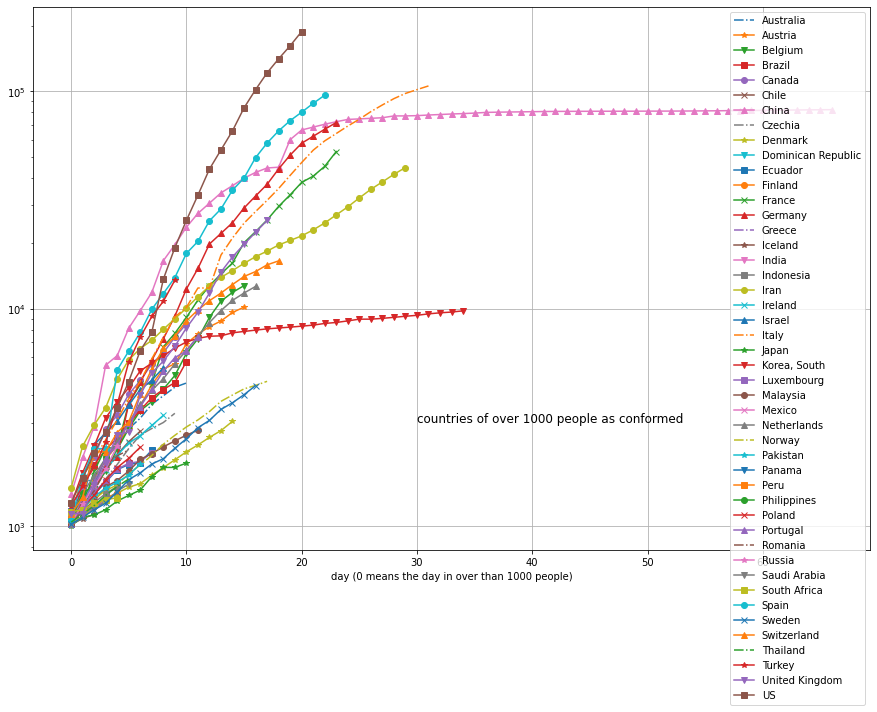

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams["figure.facecolor"] = "w"


fig, ax = plt.subplots(figsize=(15, 10))
maker = ["-.",'-*','-v','-s','-o','-x',"-^"]

for i,ii in enumerate(country2[1:]):
    df.plot(ax=ax, x="day",y=ii, style=maker[i%7])

#ax.get_legend().remove()
ax.grid(True)
ax.set_yscale('log')
plt.text(30, 3*10**3, "{}".format("countries of over 1000 people as conformed"), fontsize=12)
ax.set_xlabel('day (0 means the day in over than 1000 people)')
